Create a predictive model that predicts if an insurance claim is fraudulent or not

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Insurance%20Claim%20Fraud%20Detection/Automobile_insurance_fraud.csv')
df

,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES.1,71610,6510,13020,52080,Saab,92x,2004,Y
0,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
1,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
2,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
3,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
4,256,39,104594,12-10-2006,OH,250/500,1000,1351.10,0,478456,...,2,NO,64100,6410,6410,51280,Saab,95,2003,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
995,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
996,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
997,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [3]:
#The dataset do not have column names
# Assigning column names
df.columns = ['months_as_customer', 'age', 'policy_number','policy_bind_date','policy_state','policy_csl',
              'policy_deductable','policy_annual_premium','umbrella_limit','insured_zip','insured_sex','insured_education_level','insured_occupation',
              'insured_hobbies','insured_relationship','capital-gains','capital-loss','incident_date','incident_type','collision_type',
              'incident_severity','authorities_contacted','incident_state','incident_city','incident_location','incident_hour_of_the_day',
              'number_of_vehicles_involved','property_damage','bodily_injuries','witnesses','police_report_available',
              'total_claim_amount','injury_claim','property_claim','vehicle_claim','auto_make','auto_model','auto_year','fraud_reported']

In [4]:
df.columns


Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [5]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
1,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
2,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
3,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
4,256,39,104594,12-10-2006,OH,250/500,1000,1351.10,0,478456,...,2,NO,64100,6410,6410,51280,Saab,95,2003,Y


In [6]:
df.tail()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
994,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
995,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
996,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
997,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N
998,456,60,556080,11-11-1996,OH,250/500,1000,766.19,0,612260,...,3,?,5060,460,920,3680,Mercedes,E400,2007,N


In [7]:
df.shape

(999, 39)

The dataset has 999 rows and 39 columns

In [8]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

The dataset has mixed datatypes

<Axes: >

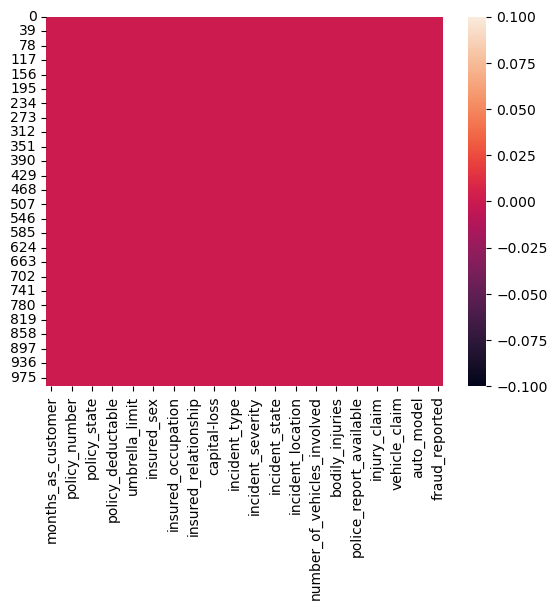

In [9]:
#checking for nullvalues using heatmap
sns.heatmap(df.isnull())

In [10]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

There are no null values in the dataset

In [11]:
# Count occurrences of '?' in each column
question_mark_counts_per_column = df.apply(lambda col: col.astype(str).str.contains('\?').sum())
print("\nCount of '?' in each column:")
print(question_mark_counts_per_column)



Count of '?' in each column:
months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage          

In [12]:
# Replace '?' with NaN in all columns
df = df.replace('?', 0)


df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,0,5070,780,780,3510,Mercedes,E400,2007,Y
1,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
2,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
3,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
4,256,39,104594,12-10-2006,OH,250/500,1000,1351.10,0,478456,...,2,NO,64100,6410,6410,51280,Saab,95,2003,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,0,87200,17440,8720,61040,Honda,Accord,2006,N
995,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,0,108480,18080,18080,72320,Volkswagen,Passat,2015,N
996,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
997,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [13]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [14]:
for column in df.columns:
    # Collect the unique datatypes in the column
    unique_dtypes = set(type(value) for value in df[column])
    
    # Check if the column has more than one datatype
    if len(unique_dtypes) > 1:
        print(f"Column '{column}' has mixed datatypes: {unique_dtypes}")
    else:
        print(f"Column '{column}' has a single datatype: {unique_dtypes}")

Column 'months_as_customer' has a single datatype: {<class 'int'>}
Column 'age' has a single datatype: {<class 'int'>}
Column 'policy_number' has a single datatype: {<class 'int'>}
Column 'policy_bind_date' has a single datatype: {<class 'str'>}
Column 'policy_state' has a single datatype: {<class 'str'>}
Column 'policy_csl' has a single datatype: {<class 'str'>}
Column 'policy_deductable' has a single datatype: {<class 'int'>}
Column 'policy_annual_premium' has a single datatype: {<class 'float'>}
Column 'umbrella_limit' has a single datatype: {<class 'int'>}
Column 'insured_zip' has a single datatype: {<class 'int'>}
Column 'insured_sex' has a single datatype: {<class 'str'>}
Column 'insured_education_level' has a single datatype: {<class 'str'>}
Column 'insured_occupation' has a single datatype: {<class 'str'>}
Column 'insured_hobbies' has a single datatype: {<class 'str'>}
Column 'insured_relationship' has a single datatype: {<class 'str'>}
Column 'capital-gains' has a single datat

In [15]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           999 non-null    int64  
 1   age                          999 non-null    int64  
 2   policy_number                999 non-null    int64  
 3   policy_bind_date             999 non-null    object 
 4   policy_state                 999 non-null    object 
 5   policy_csl                   999 non-null    object 
 6   policy_deductable            999 non-null    int64  
 7   policy_annual_premium        999 non-null    float64
 8   umbrella_limit               999 non-null    int64  
 9   insured_zip                  999 non-null    int64  
 10  insured_sex                  999 non-null    object 
 11  insured_education_level      999 non-null    object 
 12  insured_occupation           999 non-null    object 
 13  insured_hobbies     

The dataset has mixed datatypes, one column has float datatye, 17 columns has int type while 21 columns has the object datatype

In [17]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

194    8
230    7
140    7
101    7
128    7
      ..
390    1
411    1
453    1
448    1
17     1
Name: months_as_customer, Length: 391, dtype: int64


43    49
39    48
41    45
34    44
30    42
38    42
31    42
37    41
33    39
32    38
40    38
29    35
46    33
35    32
42    32
36    32
44    32
28    30
45    26
26    26
47    24
48    24
27    24
57    16
49    14
25    14
55    14
50    13
53    13
54    10
24    10
61    10
60     9
51     9
56     8
58     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
19     1
20     1
22     1
Name: age, dtype: int64


342868    1
757644    1
223404    1
991480    1
804219    1
         ..
620855    1
583169    1
337677    1
445973    1
556080    1
Name: policy_number, Length: 999, dtype: int64


05-08-1992    3
01-01-2006    3
28-04-1992    3
09-08-2004    2
09-03-2003    2
             ..
12-12-1998    1
18-02-1999    1
30-10-1997    1
29-11-1999    1
11-11-1996    1
Name: policy_bind_date, Length: 950, dtype: int64


In [18]:
#checking number of unique values in each column
df.nunique().to_frame("No. of unique values")

,No. of unique values
months_as_customer,391
age,46
policy_number,999
policy_bind_date,950
policy_state,3
policy_csl,3
policy_deductable,3
policy_annual_premium,990
umbrella_limit,11
insured_zip,994


These are the unique values present in the dataset.

In [19]:
#Dropping Unnecessary Columns
df.drop("policy_number",axis = 1, inplace = True)
df.drop("policy_bind_date",axis = 1, inplace = True)
df.drop("policy_annual_premium",axis = 1, inplace = True)
df.drop("insured_zip",axis = 1, inplace = True)
df.drop("incident_location",axis = 1, inplace = True)
df.drop("total_claim_amount",axis = 1, inplace = True)
df.drop("age",axis = 1, inplace = True)
df.drop("incident_hour_of_the_day",axis = 1, inplace = True)
df.drop("incident_date",axis = 1, inplace = True)


In [20]:
df.drop("collision_type",axis = 1, inplace = True)
df.drop("property_damage",axis = 1, inplace = True)
df.drop("police_report_available",axis = 1, inplace = True)

In [35]:
df.drop("auto_year",axis = 1, inplace = True)

In [21]:
df.describe()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim,auto_year
count,999.000000,999.000000,9.990000e+02,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,203.829830,1136.136136,1.102102e+06,25097.897898,-26820.520521,1.839840,0.991992,1.486486,7434.344344,7393.943944,37914.784785,2005.104104
std,115.103809,612.155989,2.298293e+06,27871.869471,28105.366259,1.019044,0.820538,1.111773,4883.309038,4823.859773,18890.397013,6.018773
min,0.000000,500.000000,-1.000000e+06,0.000000,-111100.000000,1.000000,0.000000,0.000000,0.000000,0.000000,70.000000,1995.000000
25%,115.500000,500.000000,0.000000e+00,0.000000,-51500.000000,1.000000,0.000000,1.000000,4290.000000,4440.000000,30275.000000,2000.000000
50%,199.000000,1000.000000,0.000000e+00,0.000000,-24100.000000,1.000000,1.000000,1.000000,6780.000000,6750.000000,42080.000000,2005.000000
75%,276.000000,2000.000000,0.000000e+00,51000.000000,0.000000,3.000000,2.000000,2.000000,11310.000000,10870.000000,50775.000000,2010.000000
max,479.000000,2000.000000,1.000000e+07,100500.000000,0.000000,4.000000,2.000000,3.000000,21450.000000,23670.000000,79560.000000,2015.000000


From the statistical summary, We can observe the following

The counts of all columns are the same, there are no missing values in the dataset.
The median(50%) is less than the mean in most columns, this means that the data is skewed to the right.
There is a huge diference between 75% and max meaning there are outliers present in the dataset.
We can also notice the standard deviation,min and 25% percentile values.

Univariate Analysis

N    753
Y    246
Name: fraud_reported, dtype: int64


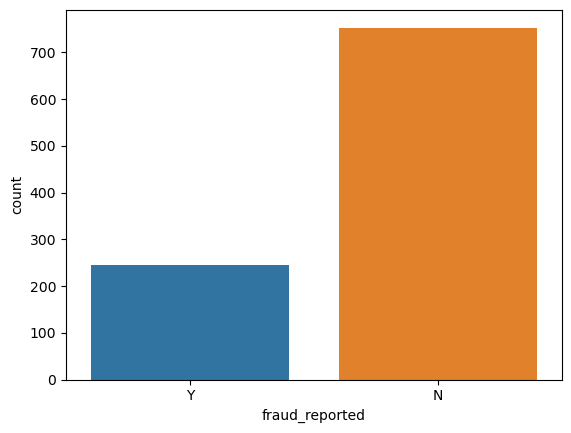

In [22]:
# Visualise the count of fraud_reported
ax = sns.countplot(x="fraud_reported",data = df)
print(df['fraud_reported'].value_counts())

The count of fraud not reported in the dataset is less than than the count of those reported

250/500     350
100/300     349
500/1000    300
Name: policy_csl, dtype: int64


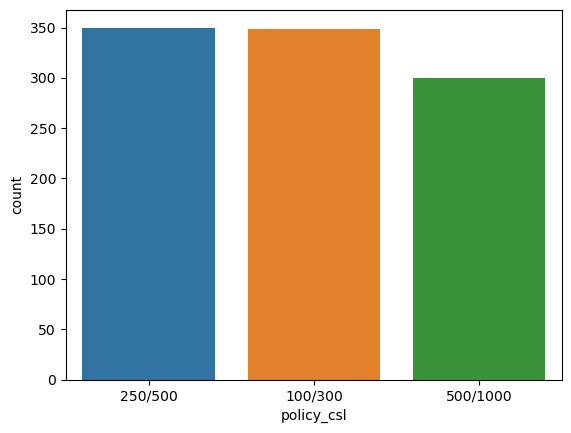

In [23]:
# Visualise the count of policy_csl
ax = sns.countplot(x="policy_csl",data = df)
print(df['policy_csl'].value_counts())

OH    351
IL    338
IN    310
Name: policy_state, dtype: int64


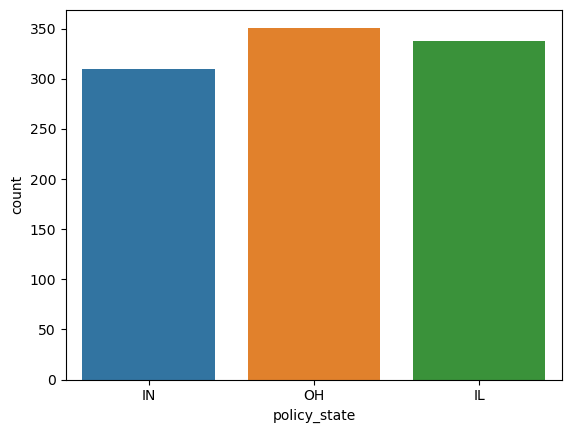

In [24]:
# Visualise the count of policy_state
ax = sns.countplot(x="policy_state",data = df)
print(df['policy_state'].value_counts())

1000    350
500     342
2000    307
Name: policy_deductable, dtype: int64


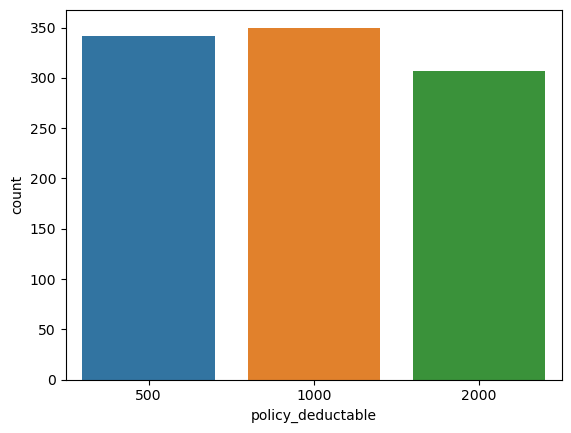

In [25]:
# Visualise the count of policy_deductable
ax = sns.countplot(x="policy_deductable",data = df)
print(df['policy_deductable'].value_counts())

FEMALE    537
MALE      462
Name: insured_sex, dtype: int64


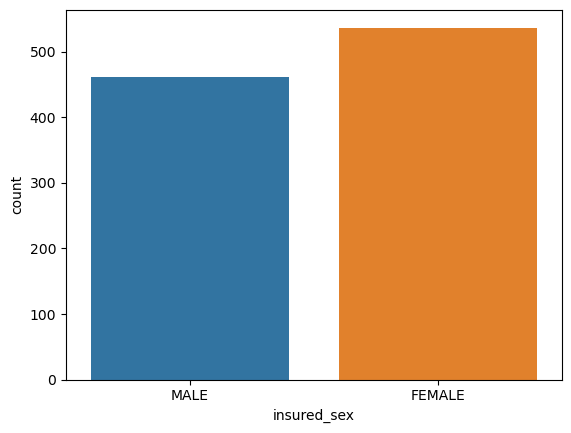

In [26]:
# Visualise the count of insured_sex
ax = sns.countplot(x="insured_sex",data = df)
print(df['insured_sex'].value_counts())

The count of insured male in the dataset is less than than the count of the insured female

Multi-vehicle Collision     419
Single Vehicle Collision    402
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64


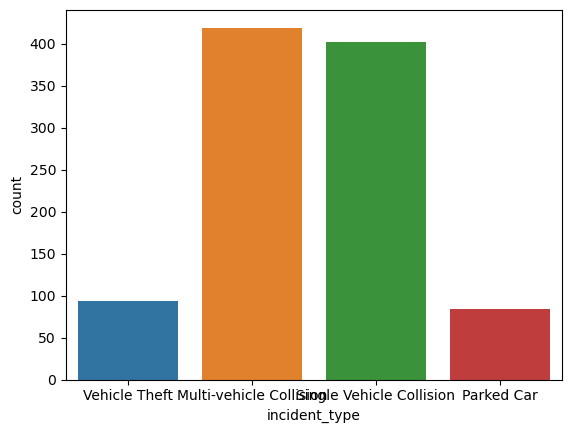

In [27]:
# Visualise the count of incident_type
ax = sns.countplot(x="incident_type",data = df)
print(df['incident_type'].value_counts())

Minor Damage      354
Total Loss        280
Major Damage      275
Trivial Damage     90
Name: incident_severity, dtype: int64


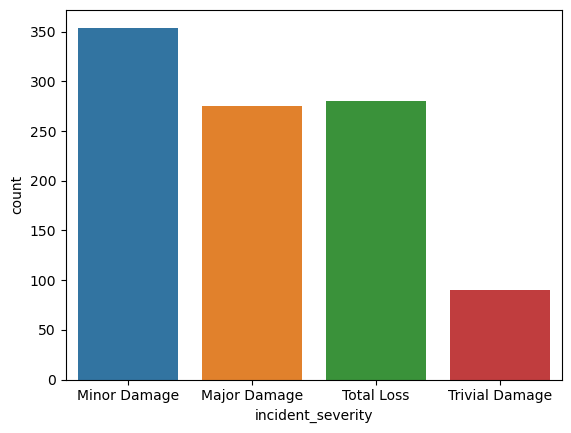

In [28]:
# Visualise the count of incident_severity
ax = sns.countplot(x="incident_severity",data = df)
print(df['incident_severity'].value_counts())

The count of minor damage is the highest

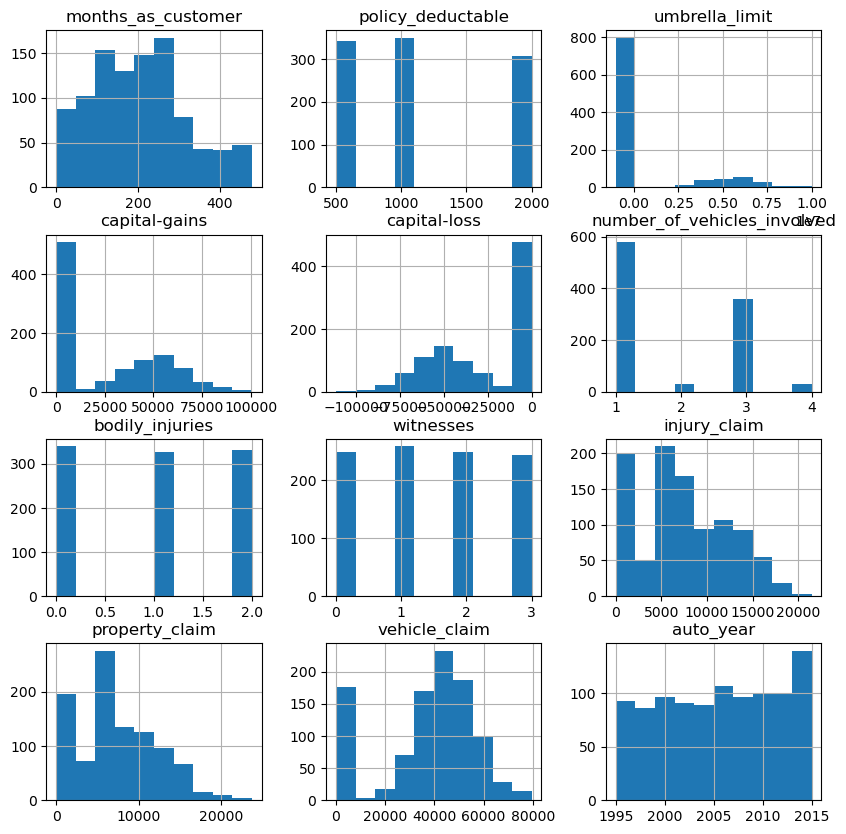

In [29]:
df.hist(bins=10,figsize=(10,10));

Bivariate Analysis

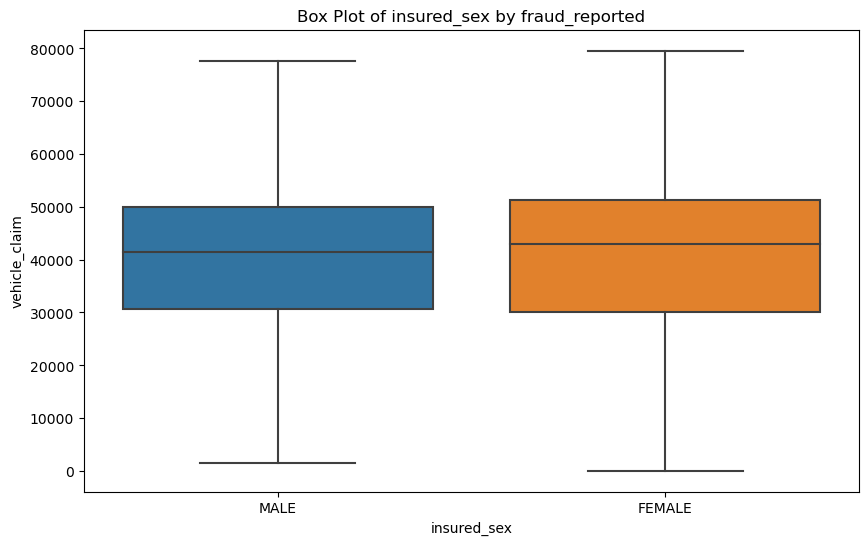

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='insured_sex', y='vehicle_claim', data=df)
plt.title('Box Plot of insured_sex by fraud_reported')
plt.show()

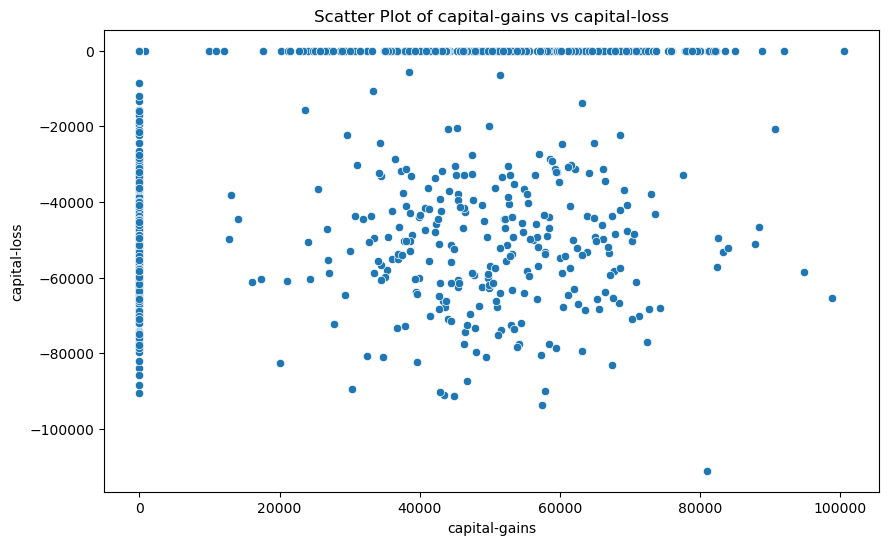

In [31]:
# Scatter plot for capital-gains vs capital-loss
plt.figure(figsize=(10, 6))
sns.scatterplot(x='capital-gains', y='capital-loss', data=df)
plt.title('Scatter Plot of capital-gains vs capital-loss')
plt.xlabel('capital-gains')
plt.ylabel('capital-loss')
plt.show()

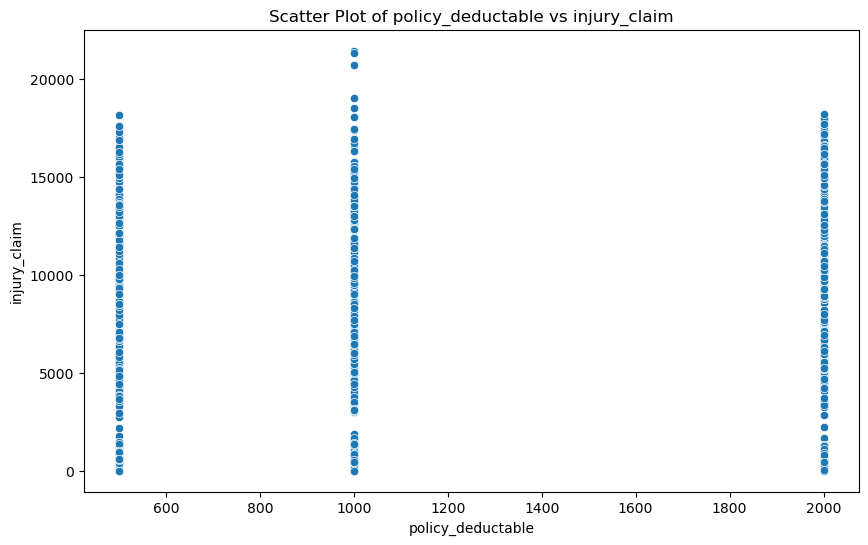

In [32]:
# Scatter plot for policy_deductable vs injury_claim
plt.figure(figsize=(10, 6))
sns.scatterplot(x='policy_deductable', y='injury_claim', data=df)
plt.title('Scatter Plot of policy_deductable vs injury_claim')
plt.xlabel('policy_deductable')
plt.ylabel('injury_claim')
plt.show()

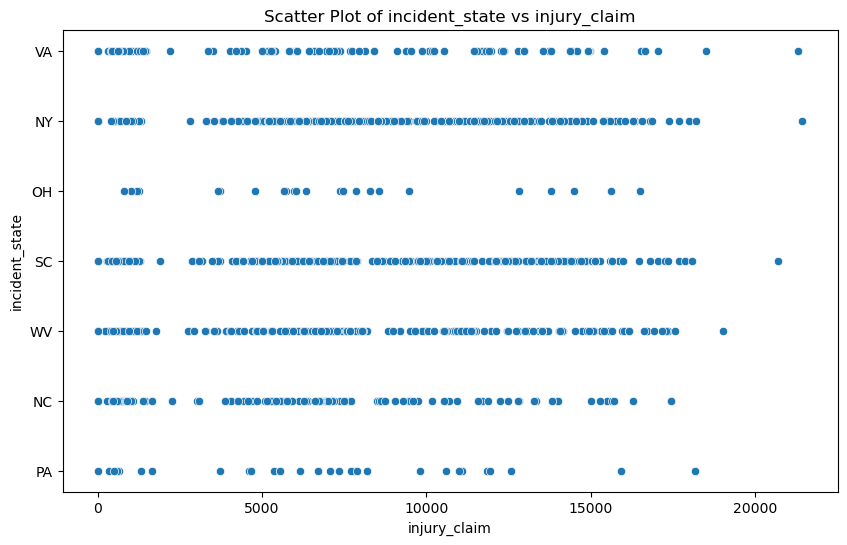

In [33]:
# Scatter plot for incident_state vs injury_claim
plt.figure(figsize=(10, 6))
sns.scatterplot(x='injury_claim', y='incident_state', data=df)
plt.title('Scatter Plot of incident_state vs injury_claim')
plt.xlabel('injury_claim')
plt.ylabel('incident_state')
plt.show()

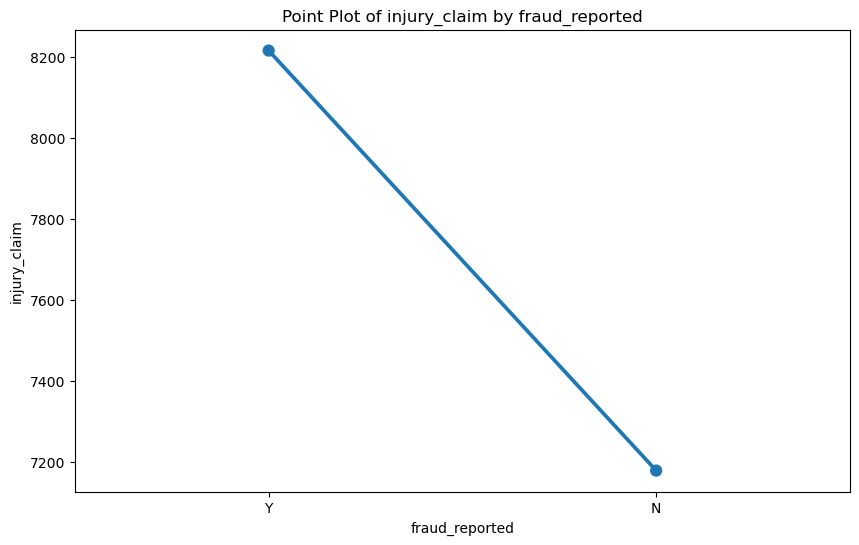

In [34]:
# Point plot
plt.figure(figsize=(10, 6))
sns.pointplot(x='fraud_reported', y='injury_claim', data=df, ci=None)
plt.title('Point Plot of injury_claim by fraud_reported')
plt.show()

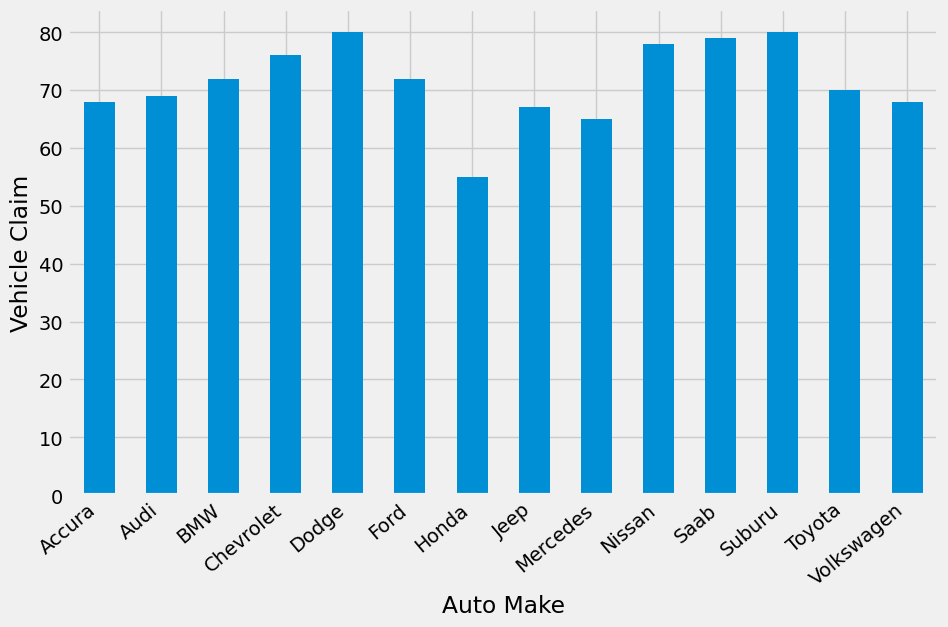

In [36]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax= df.groupby('auto_make').vehicle_claim.count().plot.bar(ylim=0)
ax.set_ylabel('Vehicle Claim')
ax.set_xlabel('Auto Make')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

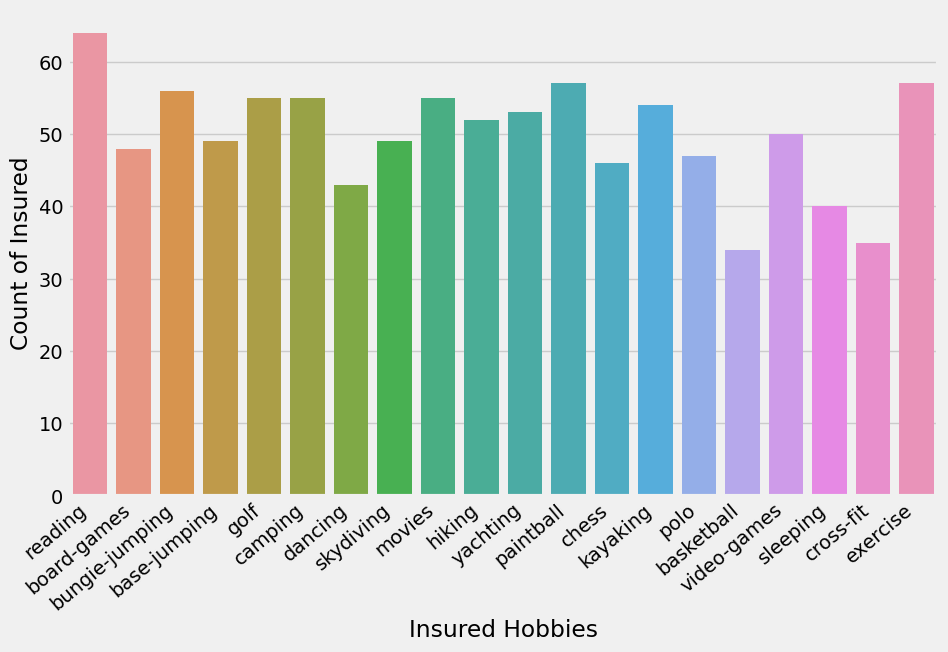

In [37]:
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x='insured_hobbies', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.xlabel('Insured Hobbies')
plt.ylabel('Count of Insured')
plt.show()

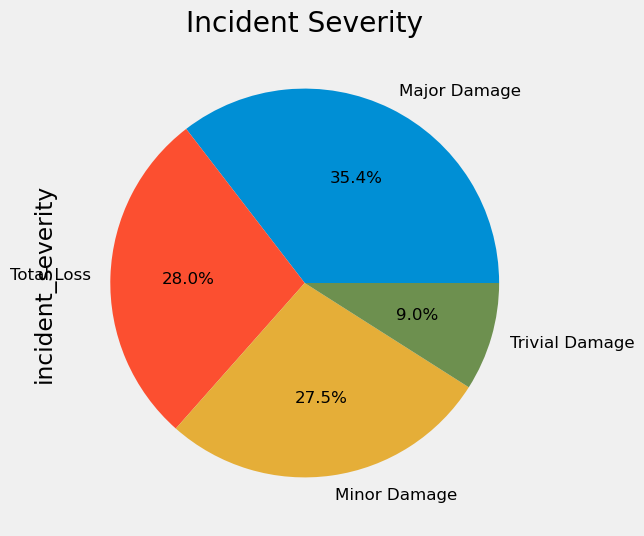

In [39]:
fig = plt.figure(figsize=(6,6))
ax = (df['incident_severity'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Major Damage', 'Total Loss', 'Minor Damage', 'Trivial Damage'],
         fontsize=12)
plt.title('Incident Severity');

From the dataset, we can see the major damge has the highest number of incident severity

Text(0, 0.5, 'Authorities Contacted')

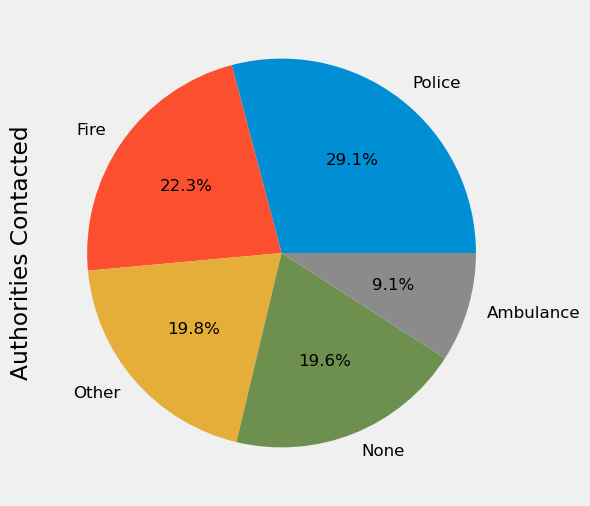

In [40]:
fig = plt.figure(figsize=(6,6))
ax = (df['authorities_contacted'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Police', 'Fire', 'Other', 'None', 'Ambulance'],
         fontsize=12)
plt.ylabel('Authorities Contacted')

The police were the highest number of authorities contacted

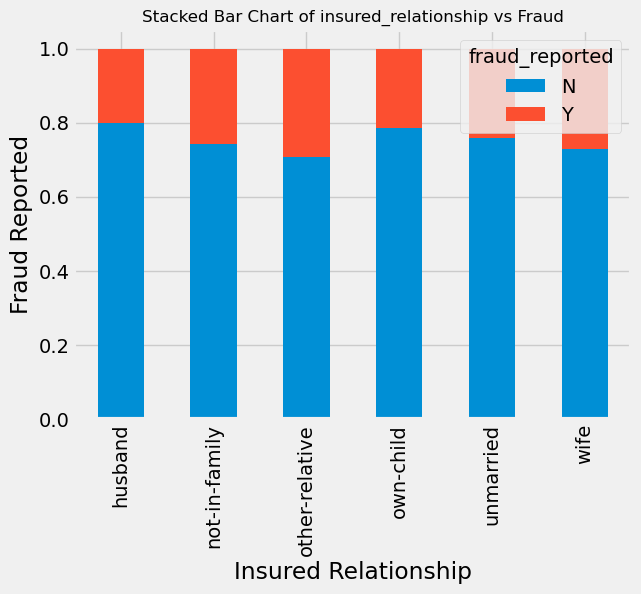

In [41]:
table=pd.crosstab(df.insured_relationship, df.fraud_reported)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of insured_relationship vs Fraud', fontsize=12)
plt.xlabel('Insured Relationship')
plt.ylabel('Fraud Reported')
plt.show()

Text(0, 0.5, 'Incident Type')

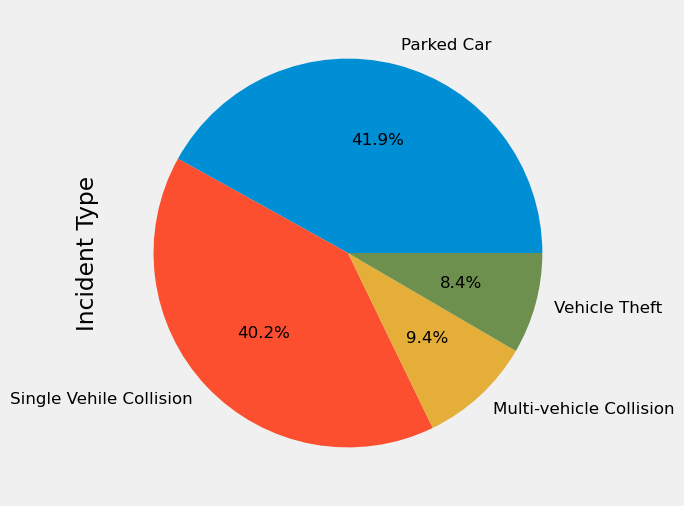

In [42]:
fig = plt.figure(figsize=(6,6))
ax = (df['incident_type'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Parked Car', 'Single Vehile Collision', 'Multi-vehicle Collision', 'Vehicle Theft'],
         fontsize=12)
plt.ylabel('Incident Type')

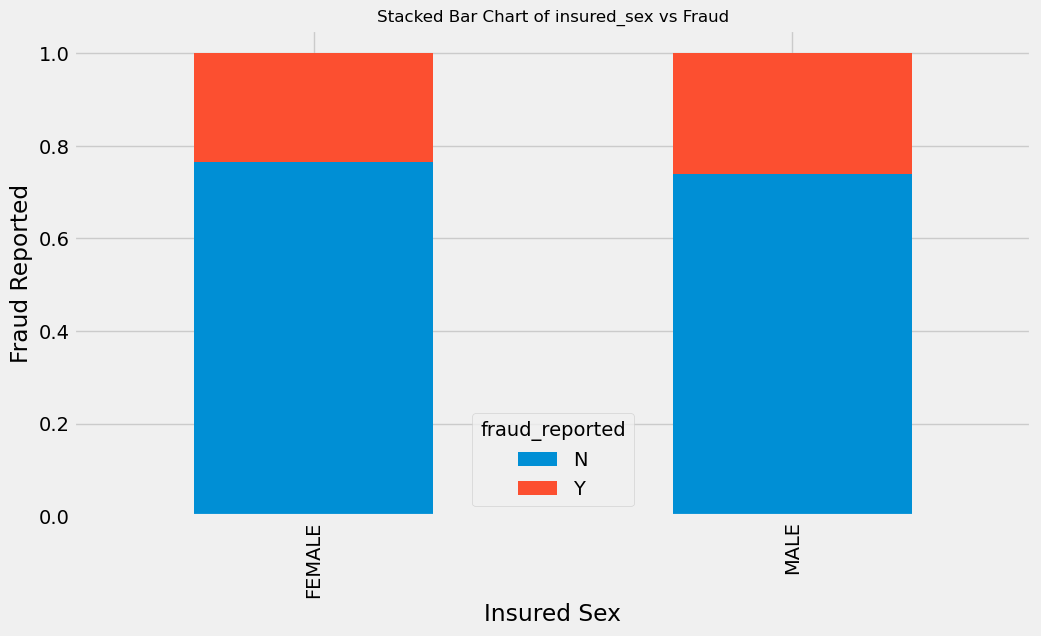

In [43]:
plt.rcParams['figure.figsize'] = [11, 6]
table=pd.crosstab(df.insured_sex, df.fraud_reported)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of insured_sex vs Fraud', fontsize=12)
plt.xlabel('Insured Sex')
plt.ylabel('Fraud Reported')
plt.show()

Multivariate Analysis

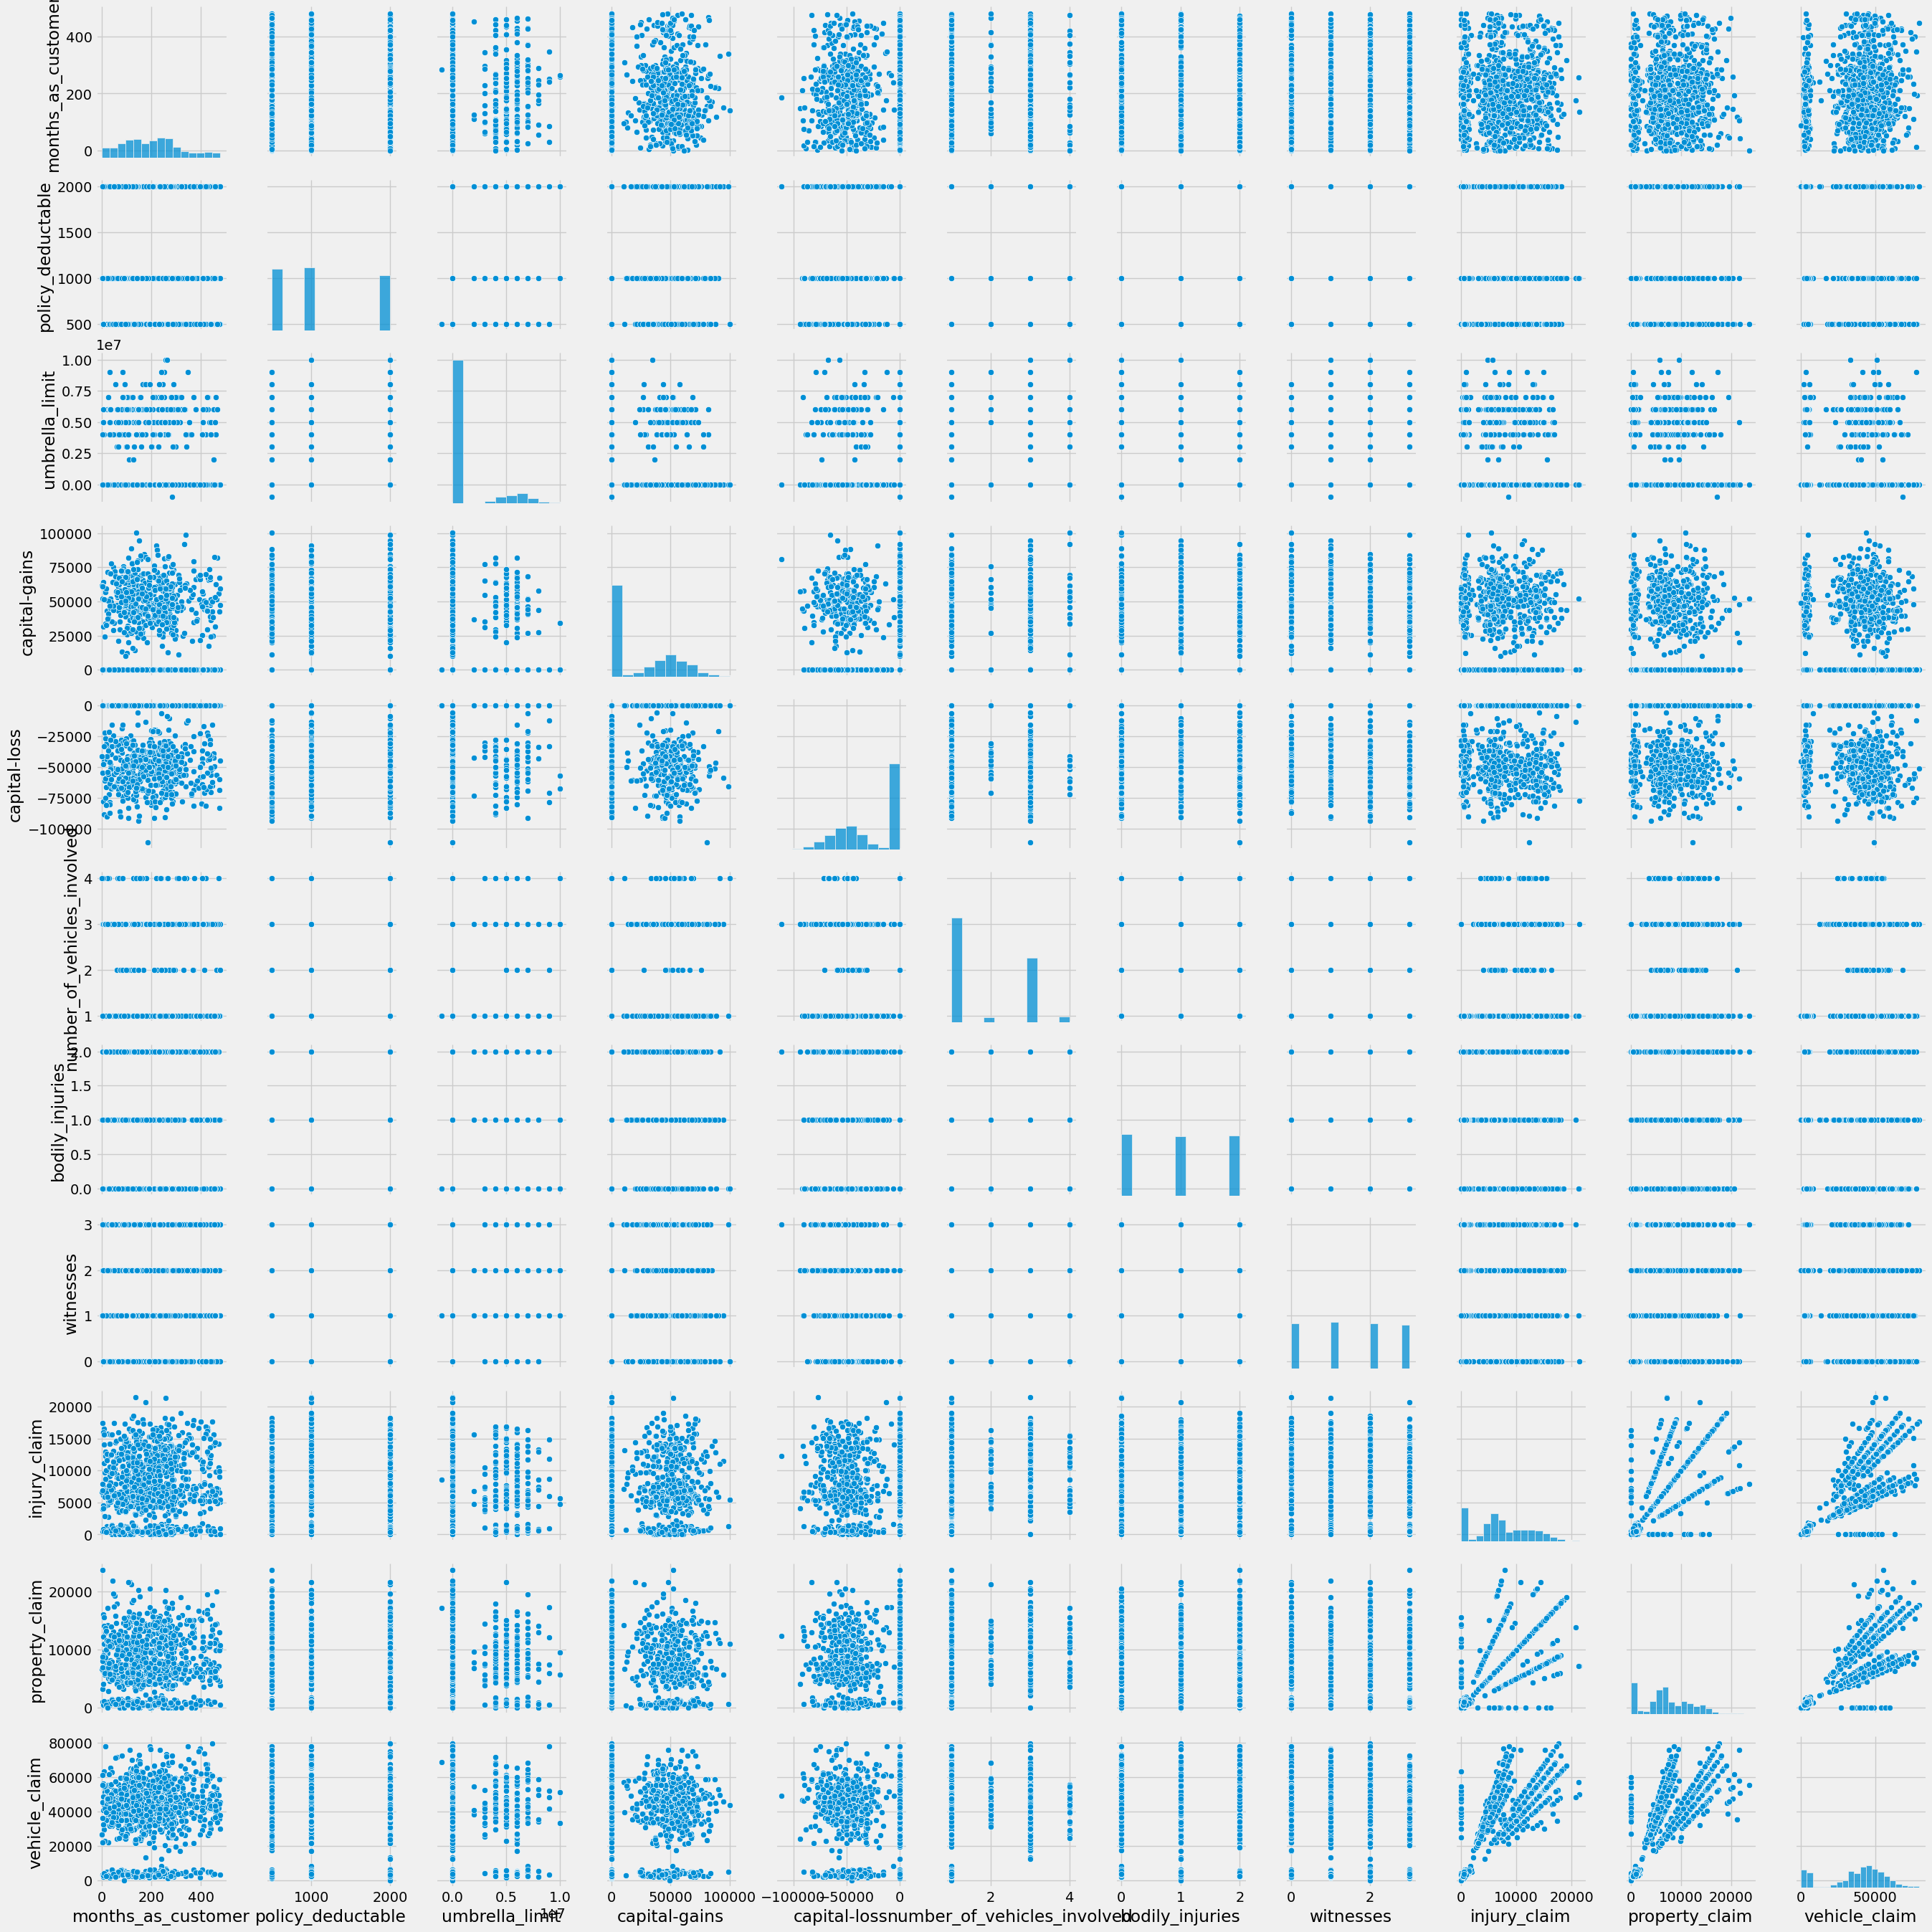

In [44]:
# Pairplot for pairwise relationships
sns.pairplot(df)
plt.show()

In [45]:
#Encoding categorical columns using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes =='object':
        df[i] = OE.fit_transform(df[i].values.reshape(-1,1))
df

,months_as_customer,policy_state,policy_csl,policy_deductable,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,...,incident_city,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported
0,228,1.0,1.0,2000,5000000,1.0,4.0,6.0,15.0,2.0,...,5.0,1,0,0,780,780,3510,8.0,12.0,1.0
1,134,2.0,0.0,2000,5000000,0.0,6.0,11.0,2.0,3.0,...,1.0,3,2,3,7700,3850,23100,4.0,30.0,0.0
2,256,0.0,1.0,2000,6000000,0.0,6.0,1.0,2.0,4.0,...,0.0,1,1,2,6340,6340,50720,3.0,34.0,1.0
3,228,0.0,2.0,1000,6000000,1.0,0.0,11.0,2.0,4.0,...,0.0,1,0,1,1300,650,4550,0.0,31.0,0.0
4,256,2.0,1.0,1000,0,0.0,6.0,12.0,3.0,4.0,...,0.0,3,0,2,6410,6410,51280,10.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,3,2.0,2.0,1000,0,0.0,5.0,2.0,13.0,4.0,...,4.0,1,0,1,17440,8720,61040,6.0,6.0,0.0
995,285,0.0,0.0,1000,0,0.0,6.0,9.0,17.0,5.0,...,3.0,1,2,3,18080,18080,72320,13.0,28.0,0.0
996,130,2.0,1.0,500,3000000,0.0,5.0,1.0,3.0,2.0,...,0.0,3,2,3,7500,7500,52500,11.0,19.0,0.0
997,458,0.0,2.0,2000,5000000,1.0,0.0,5.0,0.0,5.0,...,0.0,1,0,1,5220,5220,36540,1.0,5.0,0.0


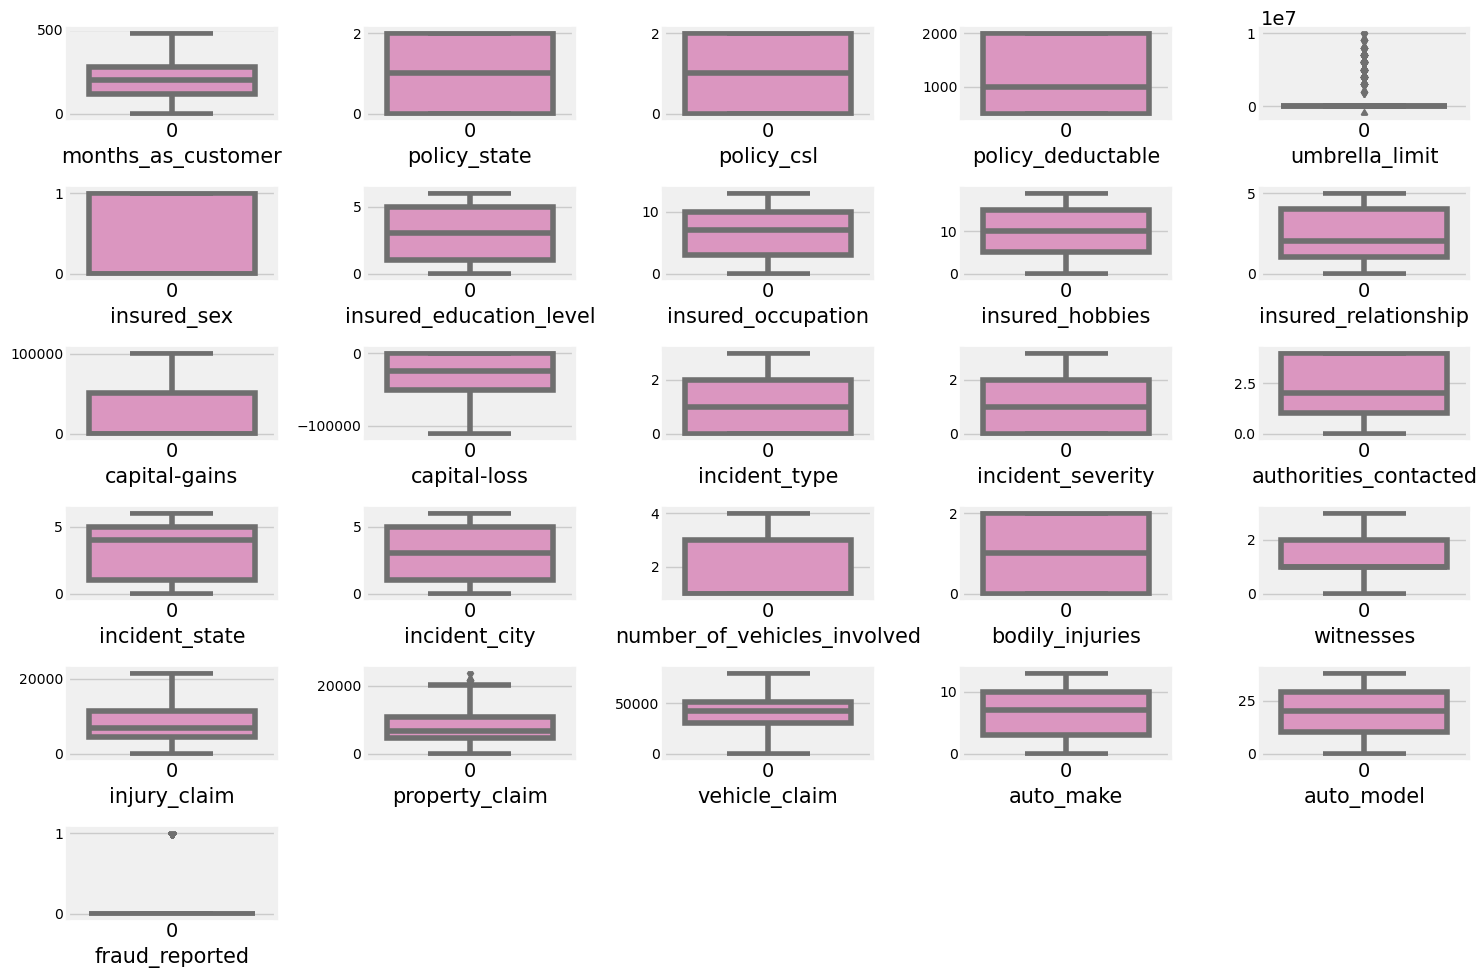

In [50]:
# checking for outliers by plotting boxplot
plt.figure(figsize = (15,10),facecolor ='white')
plotnumber = 1
for col in df:
    if plotnumber<=26:
        ax = plt.subplot(6,5,plotnumber)
        sns.boxplot(df[col],palette = "Set2_r")
        plt.xlabel(col,fontsize = 15)
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber+=1
plt.tight_layout()

some columns have outliers so we will remove using zscore method

In [51]:
# Remove outliers using the zscore method
from scipy.stats import zscore
z_scores = np.abs(zscore(df))
z_scores

,months_as_customer,policy_state,policy_csl,policy_deductable,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,...,incident_city,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported
0,0.210091,0.015671,0.060967,1.411889,1.696847,1.078118,0.531272,0.163745,0.930662,0.249168,...,0.994476,0.824557,1.209559,1.337711,1.363354,1.371776,1.822197,0.361348,0.659683,1.749564
1,0.606972,1.188606,1.182018,1.411889,1.696847,0.927543,1.557849,1.081167,1.362357,0.346332,...,0.963123,1.139049,1.229087,1.362033,0.054428,0.735038,0.784642,0.630374,0.958876,0.571571
2,0.453472,1.219948,0.060967,1.411889,2.132170,0.927543,1.557849,1.408657,1.362357,0.941831,...,1.452523,0.824557,0.009764,0.462118,0.224211,0.218595,0.678209,0.878305,1.318556,1.749564
3,0.210091,1.219948,1.303953,0.222499,2.132170,1.078118,1.521882,1.081167,1.362357,0.941831,...,1.452523,0.824557,1.209559,0.437796,1.256815,1.398739,1.767115,1.622096,1.048796,0.571571
4,0.453472,1.188606,0.060967,0.222499,0.479771,0.927543,1.557849,1.330149,1.185971,0.941831,...,1.452523,1.139049,1.209559,0.462118,0.209869,0.204077,0.707868,0.857209,1.468963,1.749564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,1.745645,1.188606,1.303953,0.222499,0.479771,0.927543,1.044560,1.159675,0.577890,0.941831,...,0.505076,0.824557,1.209559,0.437796,2.049976,0.275033,1.224792,0.134513,1.199203,0.571571
995,0.705544,1.219948,1.182018,0.222499,0.479771,0.927543,1.557849,0.583202,1.283434,1.537331,...,0.015676,0.824557,1.229087,1.362033,2.181101,2.216360,1.822219,1.601001,0.779036,0.571571
996,0.641741,1.188606,0.060967,1.039694,0.826200,0.927543,1.044560,1.408657,1.185971,0.249168,...,1.452523,1.139049,1.229087,1.362033,0.013452,0.021997,0.772484,1.105140,0.030243,0.571571
997,2.209288,1.219948,1.303953,1.411889,1.696847,1.078118,1.521882,0.412728,1.715129,1.537331,...,1.452523,0.824557,1.209559,0.437796,0.453679,0.450891,0.072813,1.374166,1.289123,0.571571


In [52]:
# Set the threshold for what constitutes an outlier
threshold = 3

# Identify rows where any value in the row exceeds the threshold
outliers = (z_scores > threshold).any(axis=1)

# Filter the DataFrame to remove outliers
df = df[~outliers]

# Display the cleaned DataFrame
df

,months_as_customer,policy_state,policy_csl,policy_deductable,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,...,incident_city,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported
0,228,1.0,1.0,2000,5000000,1.0,4.0,6.0,15.0,2.0,...,5.0,1,0,0,780,780,3510,8.0,12.0,1.0
1,134,2.0,0.0,2000,5000000,0.0,6.0,11.0,2.0,3.0,...,1.0,3,2,3,7700,3850,23100,4.0,30.0,0.0
2,256,0.0,1.0,2000,6000000,0.0,6.0,1.0,2.0,4.0,...,0.0,1,1,2,6340,6340,50720,3.0,34.0,1.0
3,228,0.0,2.0,1000,6000000,1.0,0.0,11.0,2.0,4.0,...,0.0,1,0,1,1300,650,4550,0.0,31.0,0.0
4,256,2.0,1.0,1000,0,0.0,6.0,12.0,3.0,4.0,...,0.0,3,0,2,6410,6410,51280,10.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,3,2.0,2.0,1000,0,0.0,5.0,2.0,13.0,4.0,...,4.0,1,0,1,17440,8720,61040,6.0,6.0,0.0
995,285,0.0,0.0,1000,0,0.0,6.0,9.0,17.0,5.0,...,3.0,1,2,3,18080,18080,72320,13.0,28.0,0.0
996,130,2.0,1.0,500,3000000,0.0,5.0,1.0,3.0,2.0,...,0.0,3,2,3,7500,7500,52500,11.0,19.0,0.0
997,458,0.0,2.0,2000,5000000,1.0,0.0,5.0,0.0,5.0,...,0.0,1,0,1,5220,5220,36540,1.0,5.0,0.0


In [53]:
#checking for skewness
df.skew()

months_as_customer             0.369461
policy_state                  -0.032359
policy_csl                     0.096170
policy_deductable              0.478456
umbrella_limit                 1.804706
insured_sex                    0.143149
insured_education_level        0.006278
insured_occupation            -0.054566
insured_hobbies               -0.059667
insured_relationship           0.077492
capital-gains                  0.471656
capital-loss                  -0.372032
incident_type                  0.093000
incident_severity              0.279158
authorities_contacted         -0.111651
incident_state                -0.151412
incident_city                  0.046406
number_of_vehicles_involved    0.508672
bodily_injuries                0.009385
witnesses                      0.022923
injury_claim                   0.267994
property_claim                 0.362317
vehicle_claim                 -0.619113
auto_make                     -0.027800
auto_model                    -0.075403


data is normal

In [54]:
#Checking Correlation between the target and independent variables
cor = df.corr()
cor

,months_as_customer,policy_state,policy_csl,policy_deductable,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,...,incident_city,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported
months_as_customer,1.000000,-0.006768,-0.023585,0.032826,0.019915,0.058955,-0.001277,0.010635,-0.091109,0.071464,...,-0.002866,0.012421,-0.004513,0.060486,0.064479,0.035473,0.055886,0.047107,0.006411,0.017971
policy_state,-0.006768,1.000000,0.001373,0.018441,-0.009166,-0.019417,-0.029712,-0.022861,-0.040275,-0.014721,...,0.000219,-0.042420,0.015128,0.021789,-0.048032,-0.006036,-0.006393,0.010757,-0.015649,0.033814
policy_csl,-0.023585,0.001373,1.000000,0.008492,0.012834,-0.004705,0.007054,0.014248,-0.003057,-0.032454,...,0.012365,-0.013159,-0.000410,0.071936,-0.078595,-0.041719,-0.043691,-0.007381,0.044041,-0.030321
policy_deductable,0.032826,0.018441,0.008492,1.000000,0.014064,-0.005764,0.014905,-0.052127,-0.002101,-0.020830,...,-0.045556,0.045229,-0.035306,0.070522,0.037293,0.070528,0.005387,-0.029159,-0.003730,0.014554
umbrella_limit,0.019915,-0.009166,0.012834,0.014064,1.000000,0.018936,-0.030867,0.004594,-0.033481,0.094751,...,0.040554,-0.041401,0.049343,-0.002659,-0.046784,-0.020559,-0.048025,0.013077,0.014361,0.045246
insured_sex,0.058955,-0.019417,-0.004705,-0.005764,0.018936,1.000000,0.011054,-0.004144,-0.022547,0.004563,...,0.012785,0.018509,-0.014175,0.038481,0.005017,-0.012434,-0.026635,0.019422,-0.018639,0.016887
insured_education_level,-0.001277,-0.029712,0.007054,0.014905,-0.030867,0.011054,1.000000,-0.023554,0.023535,-0.029824,...,-0.021468,0.001230,-0.018615,0.023147,0.084893,0.058983,0.070617,0.057241,0.042298,0.009434
insured_occupation,0.010635,-0.022861,0.014248,-0.052127,0.004594,-0.004144,-0.023554,1.000000,-0.009489,-0.016193,...,0.005155,-0.017826,0.002849,-0.017759,0.022237,0.010065,0.002745,0.043534,0.011771,-0.000141
insured_hobbies,-0.091109,-0.040275,-0.003057,-0.002101,-0.033481,-0.022547,0.023535,-0.009489,1.000000,-0.092989,...,0.020550,0.009734,0.026886,-0.038101,0.031563,0.009839,-0.016178,-0.000404,0.037385,-0.049096
insured_relationship,0.071464,-0.014721,-0.032454,-0.020830,0.094751,0.004563,-0.029824,-0.016193,-0.092989,1.000000,...,-0.008672,-0.043283,0.000080,-0.000913,0.032130,0.009261,-0.003265,-0.026573,0.055936,0.032176


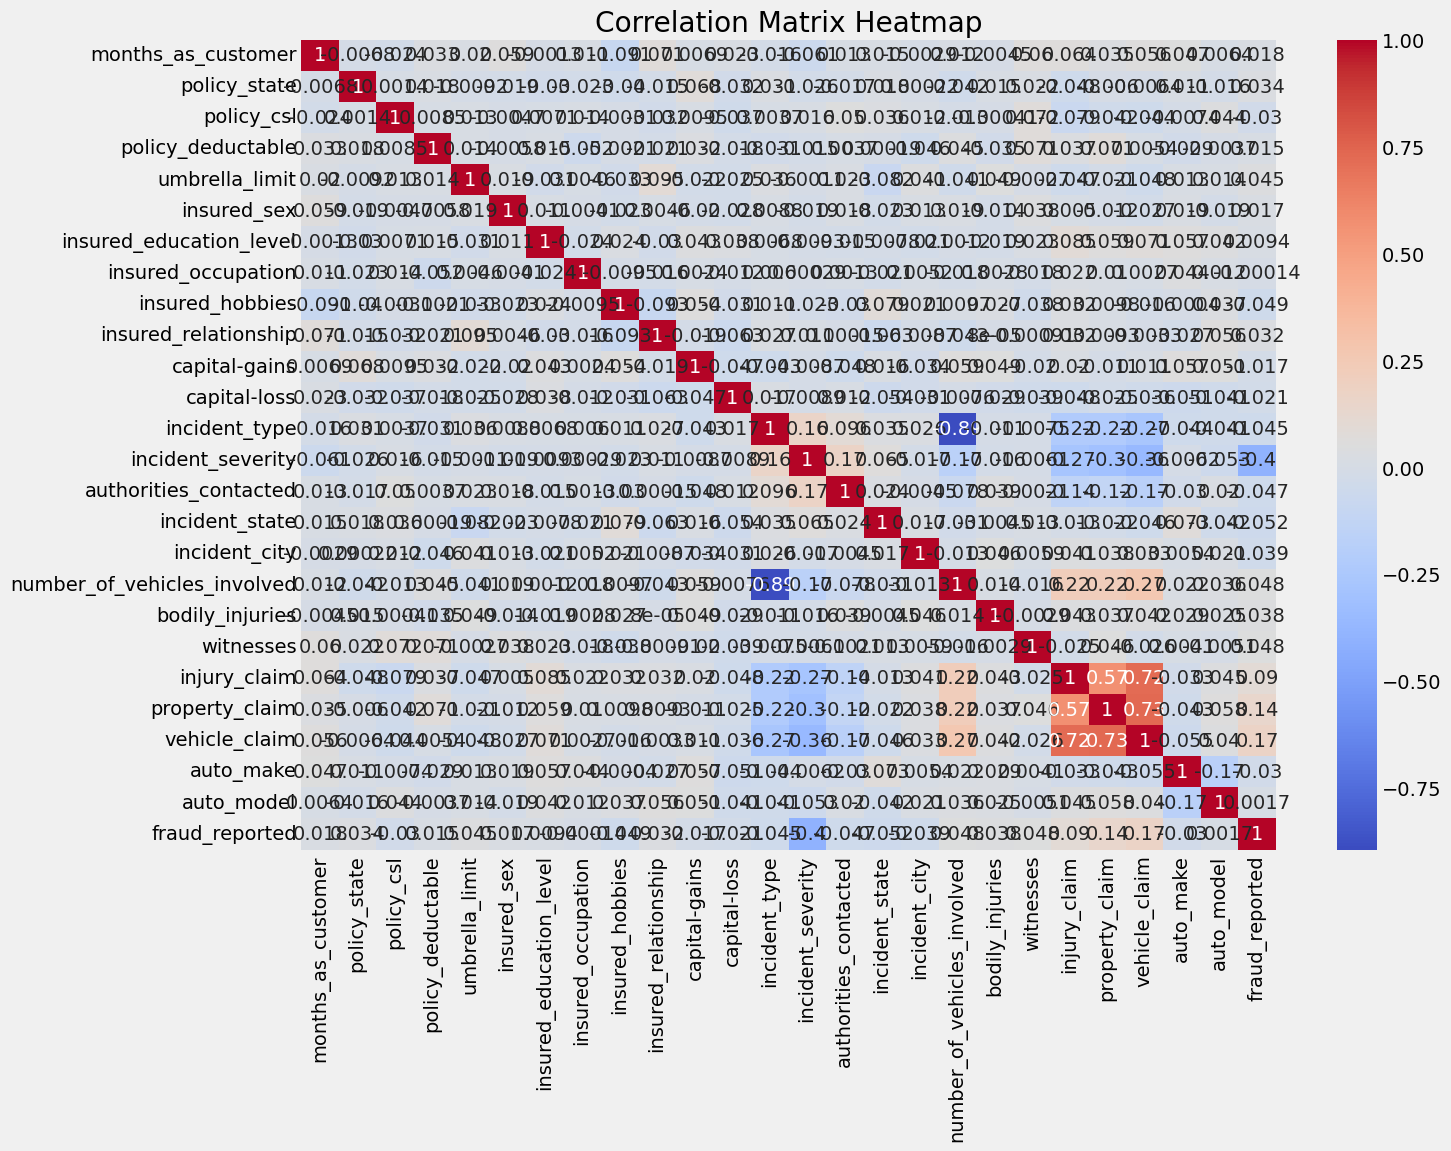

In [55]:
# Visualize the correlation matrix between the dependent and independent variables using a heatmap
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

Model Building Using machine learning algorithms

Predicting fraud_reported (Classification Problem) because the target variable is categorical

In [67]:
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report,mean_squared_error,roc_auc_score

In [57]:
# Split the dataset into features and target variable
X = df.drop('fraud_reported', axis=1)
y = df['fraud_reported']

In [58]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
# Standardize the feature variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [60]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))

Logistic Regression Accuracy: 0.7411167512690355
              precision    recall  f1-score   support

         0.0       0.76      0.93      0.84       142
         1.0       0.58      0.25      0.35        55

    accuracy                           0.74       197
   macro avg       0.67      0.59      0.60       197
weighted avg       0.71      0.74      0.70       197



In [61]:
# Decision Tree
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.8020304568527918
              precision    recall  f1-score   support

         0.0       0.85      0.88      0.87       142
         1.0       0.66      0.60      0.63        55

    accuracy                           0.80       197
   macro avg       0.76      0.74      0.75       197
weighted avg       0.80      0.80      0.80       197



In [62]:
# Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.7309644670050761
              precision    recall  f1-score   support

         0.0       0.76      0.92      0.83       142
         1.0       0.54      0.25      0.35        55

    accuracy                           0.73       197
   macro avg       0.65      0.59      0.59       197
weighted avg       0.70      0.73      0.70       197



In [63]:
# Gradient Boosting
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_clf.fit(X_train, y_train)
y_pred_gb = gb_clf.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))

Gradient Boosting Accuracy: 0.8020304568527918
              precision    recall  f1-score   support

         0.0       0.83      0.91      0.87       142
         1.0       0.69      0.53      0.60        55

    accuracy                           0.80       197
   macro avg       0.76      0.72      0.73       197
weighted avg       0.79      0.80      0.79       197



In [64]:
from sklearn.svm import SVC

# Train SVM model
svm_clf = SVC()
svm_clf.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_clf.predict(X_test)

# Evaluate the model
print("Support Vector Machine")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

Support Vector Machine
Accuracy: 0.7258883248730964
              precision    recall  f1-score   support

         0.0       0.73      0.99      0.84       142
         1.0       0.60      0.05      0.10        55

    accuracy                           0.73       197
   macro avg       0.66      0.52      0.47       197
weighted avg       0.69      0.73      0.63       197



In [65]:
from sklearn.neural_network import MLPClassifier

# Train Neural Network model
mlp_clf = MLPClassifier(max_iter=1000)
mlp_clf.fit(X_train, y_train)

# Make predictions
y_pred_mlp = mlp_clf.predict(X_test)

# Evaluate the model
print("Neural Network")
print("Accuracy:", accuracy_score(y_test, y_pred_mlp))
print(classification_report(y_test, y_pred_mlp))

Neural Network
Accuracy: 0.700507614213198
              precision    recall  f1-score   support

         0.0       0.77      0.82      0.80       142
         1.0       0.46      0.38      0.42        55

    accuracy                           0.70       197
   macro avg       0.62      0.60      0.61       197
weighted avg       0.69      0.70      0.69       197



The best model is Gradient Boosting because it has the highest accuracy score: 0.8020304568527918

Hyperparameter Tuning on the best model Gradient Boosting

In [68]:
# Initialize the GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=gbc, param_grid=param_grid,
                           scoring='accuracy', cv=5, verbose=2, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print(f'Best parameters found: {grid_search.best_params_}')
print(f'Best accuracy score: {grid_search.best_score_}')

# Predict with the best estimator
best_gbc = grid_search.best_estimator_
y_pred = best_gbc.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

Fitting 5 folds for each of 2187 candidates, totalling 10935 fits
Best parameters found: {'learning_rate': 0.2, 'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200, 'subsample': 1.0}
Best accuracy score: 0.829299363057325
